In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [3]:
DATASET_DIR = "../dataset/classification/banknote"
SAVE_NAME = "banknote_ori.csv"

In [4]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous),class (integer)
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.groupby("class (integer)").median()

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous)
class (integer),,,,
0,2.5531,5.668800,0.700605,-0.55238
1,-1.8061,0.172775,0.373720,-0.66165


In [6]:
df.groupby("class (integer)").mean()

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous)
class (integer),,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


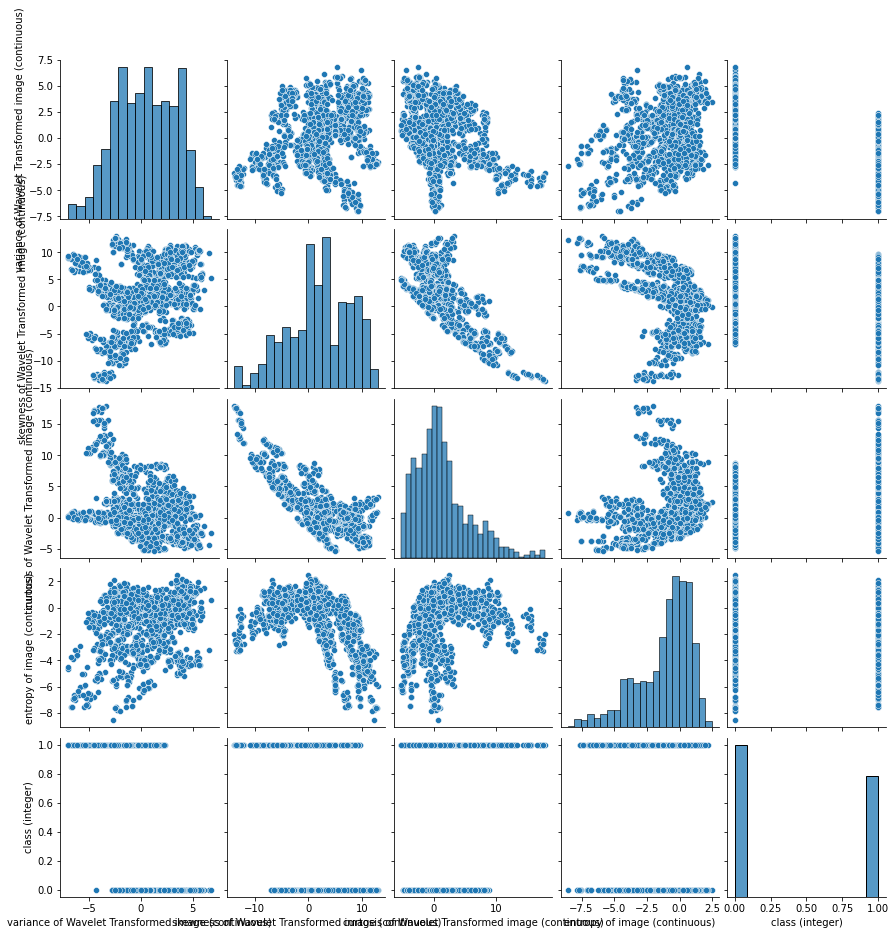

In [8]:
sns.pairplot(df)

In [18]:
df.corr().iloc[-1,:].sort_values()

variance of Wavelet Transformed image (continuous)   -0.724843
skewness of Wavelet Transformed image (continuous)   -0.444688
entropy of image (continuous)                        -0.023424
curtosis of Wavelet Transformed image (continuous)    0.155883
class (integer)                                       1.000000
Name: class (integer), dtype: float64

variance of Wavelet Transformed image (continuous)で分割

In [13]:
split_col = "variance of Wavelet Transformed image (continuous)"
med = df[split_col].median()
print(sum(df[split_col]<med), sum(df[split_col]>=med))

686 686


In [14]:
split_col = "skewness of Wavelet Transformed image (continuous)"
med = df[split_col].median()
print(sum(df[split_col]<med), sum(df[split_col]>=med))

686 686


In [17]:
split_col = "curtosis of Wavelet Transformed image (continuous)"
med = df[split_col].median()
print(sum(df[split_col]<med), sum(df[split_col]>=med))

685 687


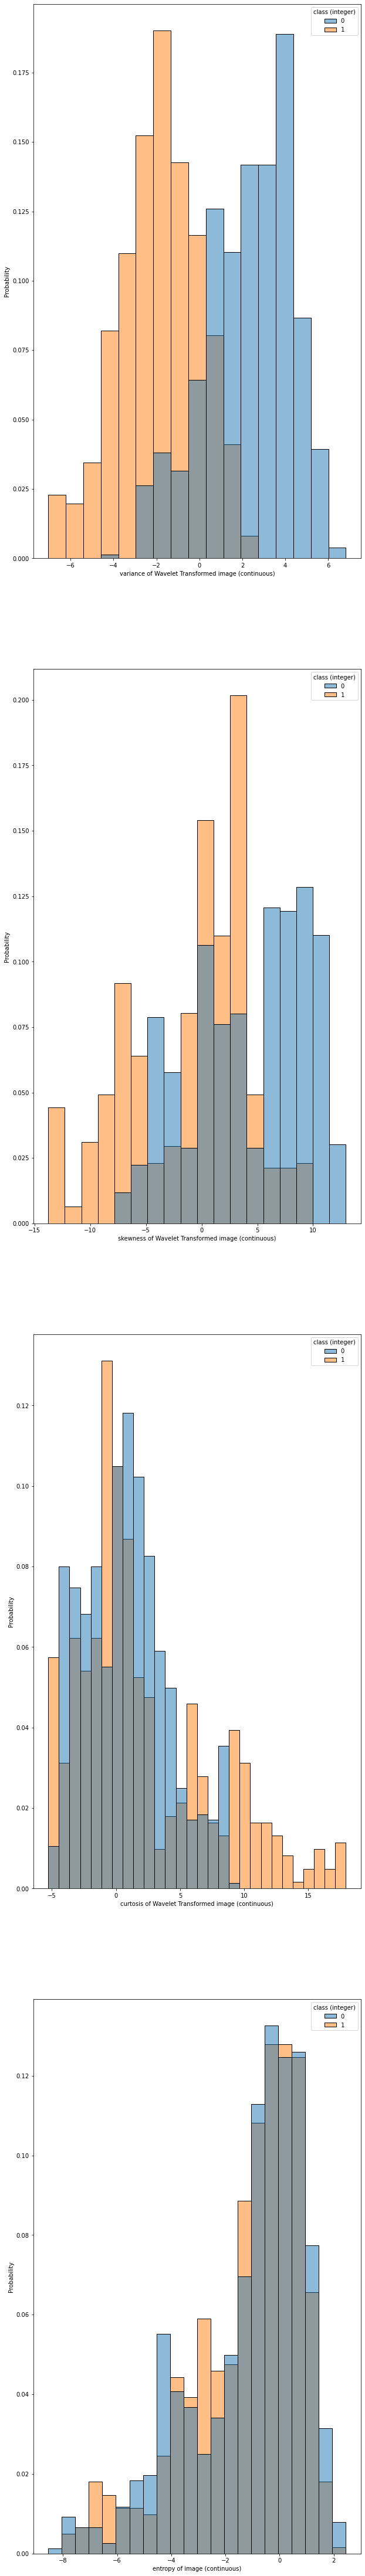

In [7]:
fig, ax = plt.subplots(len(df.columns[:-1]),1, figsize=(10,80))
for i, col in enumerate(df.columns[:-1]):
    g = sns.histplot(x=col, hue="class (integer)", stat="probability", common_norm=False, data=df, ax=ax[i], )

# t-sne

In [5]:
features_ori = df.drop(columns=["y","contact"])
is_cat_cols = features_ori.dtypes == object
cat_cols = features_ori.columns[is_cat_cols]
num_cols = features_ori.columns[~is_cat_cols]

onehot = OneHotEncoder(sparse=False)
features_cat = onehot.fit_transform(features_ori[cat_cols])

features_num = features_ori[num_cols].values

print(features_cat.shape, features_num.shape)
features = np.concatenate([features_num, features_cat], axis=1)
features.shape

(41188, 51) (41188, 10)


(41188, 61)

In [6]:
flag = (df["contact"]=="telephone").values
features[flag].shape

(15044, 61)

In [7]:
tsne = TSNE(perplexity=50, random_state=0)
features_embedd = tsne.fit_transform(features)

In [8]:
df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
df_embedd["contact"] = df["contact"]
df_embedd["y"] = df["y"]

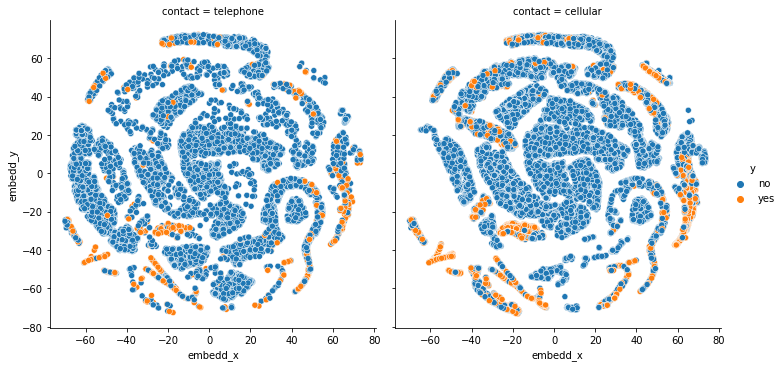

In [9]:
sns.relplot(x="embedd_x", y="embedd_y", col="contact", hue="y", data=df_embedd)